In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from config import weather_api_key 
from datetime import datetime

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | morro bay
Processing Record 2 of Set 1 | mahibadhoo
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | sungaipenuh
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | linqiong
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | porto novo
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | kyle of lochalsh


Processing Record 38 of Set 4 | cidreira
Processing Record 39 of Set 4 | sao gabriel da cachoeira
Processing Record 40 of Set 4 | kishi
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | san vicente
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | yulara
Processing Record 45 of Set 4 | yellowknife
Processing Record 46 of Set 4 | san quintin
Processing Record 47 of Set 4 | saint-augustin
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | neiafu
Processing Record 50 of Set 4 | batagay-alyta
Processing Record 1 of Set 5 | odweyne
Processing Record 2 of Set 5 | nishihara
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | curuca
Processing Record 5 of Set 5 | baruun-urt
Processing Record 6 of Set 5 | manta
Processing Record 7 of Set 5 | nabire
Processing Record 8 of Set 5 | alyangula
Processing Record 9 of Set 5 | a
City not found. Skipping.

Processing Record 27 of Set 8 | ndende
Processing Record 28 of Set 8 | jacqueville
Processing Record 29 of Set 8 | arkhara
Processing Record 30 of Set 8 | asau
Processing Record 31 of Set 8 | iranshahr
Processing Record 32 of Set 8 | san jose de sisa
Processing Record 33 of Set 8 | shenjiamen
Processing Record 34 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 35 of Set 8 | tutoia
Processing Record 36 of Set 8 | tasiilaq
Processing Record 37 of Set 8 | banyo
Processing Record 38 of Set 8 | alcantara
Processing Record 39 of Set 8 | padang
Processing Record 40 of Set 8 | kilindoni
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | thap than
Processing Record 43 of Set 8 | olot
Processing Record 44 of Set 8 | hit
Processing Record 45 of Set 8 | ikalamavony
Processing Record 46 of Set 8 | novovasylivka
Processing Record 47 of Set 8 | sorland
Processing Record 48 of Set 8 | tianpeng
Processing Record 49 of Set 8 | safaga
Processing Record 50

Processing Record 13 of Set 12 | ancud
Processing Record 14 of Set 12 | sterlibashevo
Processing Record 15 of Set 12 | sinnamary
Processing Record 16 of Set 12 | nalut
Processing Record 17 of Set 12 | haibowan
City not found. Skipping...
Processing Record 18 of Set 12 | zabid
Processing Record 19 of Set 12 | totness
Processing Record 20 of Set 12 | cabra
Processing Record 21 of Set 12 | tori fatehpur
Processing Record 22 of Set 12 | tommot
Processing Record 23 of Set 12 | nuuk
Processing Record 24 of Set 12 | ambulu
Processing Record 25 of Set 12 | long xuyen
Processing Record 26 of Set 12 | pangai
Processing Record 27 of Set 12 | kondopoga
Processing Record 28 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 29 of Set 12 | kirakira
Processing Record 30 of Set 12 | novouzensk
Processing Record 31 of Set 12 | acarau
Processing Record 32 of Set 12 | kawalu
Processing Record 33 of Set 12 | broken hill
Processing Record 34 of Set 12 | cozumel
Processing Record 35 of Set

In [48]:
len(city_data)

572

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morro Bay,35.3658,-120.8499,77.74,53,93,4.00,US,2021-10-20 21:29:29
1,Mahibadhoo,3.7833,72.9667,81.88,70,69,12.75,MV,2021-10-20 21:29:30
2,Whitehorse,60.7161,-135.0538,41.02,48,75,11.01,CA,2021-10-20 21:29:30
3,Sungaipenuh,-2.0833,101.3833,64.92,98,100,0.60,ID,2021-10-20 21:29:30
4,Busselton,-33.6500,115.3333,53.10,76,99,16.13,AU,2021-10-20 21:29:31
5,Linqiong,30.4159,103.4609,58.78,91,100,3.42,CN,2021-10-20 21:29:31
6,Vaini,-21.2000,-175.2000,77.16,88,75,10.36,TO,2021-10-20 21:29:32
7,La Ronge,55.1001,-105.2842,46.62,39,20,9.22,CA,2021-10-20 21:29:32
8,Severo-Kurilsk,50.6789,156.1250,35.17,66,84,24.05,RU,2021-10-20 21:29:33
9,Rikitea,-23.1203,-134.9692,74.89,70,6,20.98,PF,2021-10-20 21:29:33


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Morro Bay,US,2021-10-20 21:29:29,35.3658,-120.8499,77.74,53,93,4.00
1,Mahibadhoo,MV,2021-10-20 21:29:30,3.7833,72.9667,81.88,70,69,12.75
2,Whitehorse,CA,2021-10-20 21:29:30,60.7161,-135.0538,41.02,48,75,11.01
3,Sungaipenuh,ID,2021-10-20 21:29:30,-2.0833,101.3833,64.92,98,100,0.60
4,Busselton,AU,2021-10-20 21:29:31,-33.6500,115.3333,53.10,76,99,16.13
5,Linqiong,CN,2021-10-20 21:29:31,30.4159,103.4609,58.78,91,100,3.42
6,Vaini,TO,2021-10-20 21:29:32,-21.2000,-175.2000,77.16,88,75,10.36
7,La Ronge,CA,2021-10-20 21:29:32,55.1001,-105.2842,46.62,39,20,9.22
8,Severo-Kurilsk,RU,2021-10-20 21:29:33,50.6789,156.1250,35.17,66,84,24.05
9,Rikitea,PF,2021-10-20 21:29:33,-23.1203,-134.9692,74.89,70,6,20.98


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

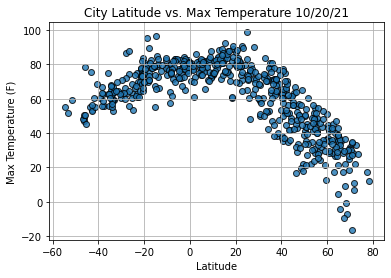

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

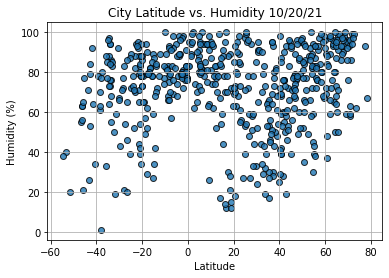

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

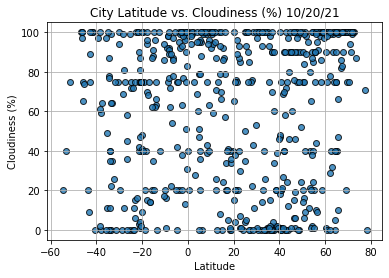

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

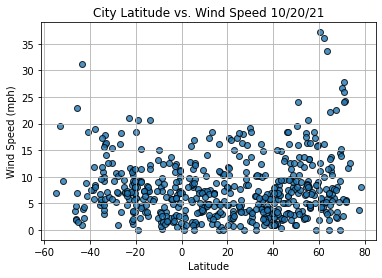

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

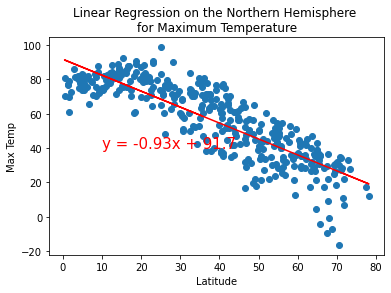

LinregressResult(slope=-0.9276808549669833, intercept=91.70286183039008, rvalue=-0.8507350517065015, pvalue=4.056274609653273e-105, stderr=0.029836104981211628)

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))
reg=linregress(x_values, y_values)
reg

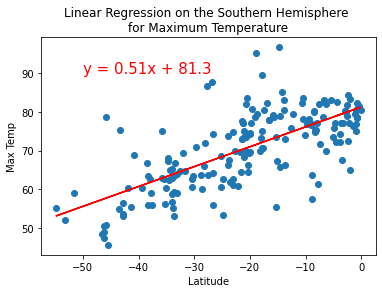

LinregressResult(slope=0.5149221054625187, intercept=81.30365697712746, rvalue=0.7032358413731079, pvalue=4.556368526088175e-29, stderr=0.038377329039174096)

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))
reg=linregress(x_values, y_values)
reg

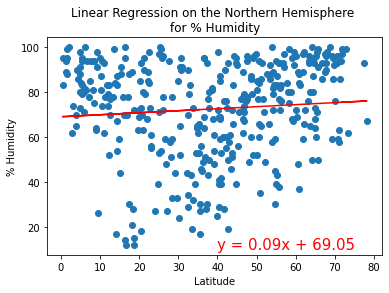

LinregressResult(slope=0.08985895655166211, intercept=69.05436214028434, rvalue=0.08566351858570236, pvalue=0.0994640434557728, stderr=0.05440676774542409)

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))
reg=linregress(x_values, y_values)
reg

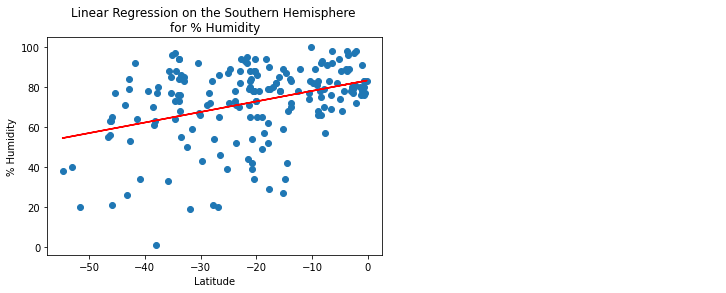

LinregressResult(slope=0.5274264597892483, intercept=83.40421368147967, rvalue=0.3788534817598555, pvalue=9.705534692473562e-08, stderr=0.094981233819)

In [93]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(40,10))
reg=linregress(x_values, y_values)
reg

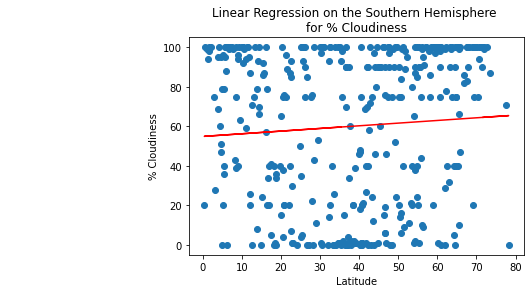

LinregressResult(slope=0.1346948920149521, intercept=54.87754786178728, rvalue=0.07076226490096076, pvalue=0.17380348156705164, stderr=0.09884305638013839)

In [92]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))
reg=linregress(x_values, y_values)
reg

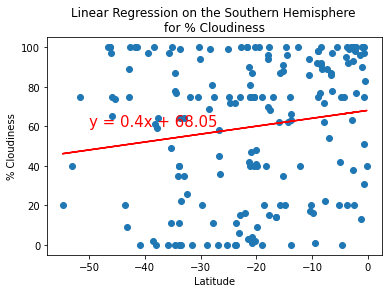

LinregressResult(slope=0.3997725338011122, intercept=68.05389821251178, rvalue=0.15392701207899104, pvalue=0.03593603598119901, stderr=0.1891830778713803)

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))
reg=linregress(x_values, y_values)
reg

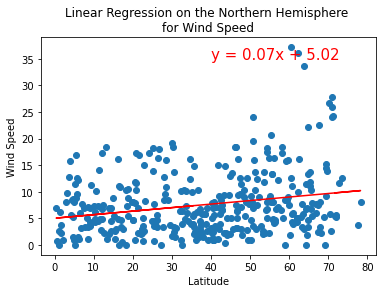

LinregressResult(slope=0.06644263743828813, intercept=5.022590434317079, rvalue=0.2273452199693928, pvalue=9.768180968151831e-06, stderr=0.014815761169722382)

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))
reg=linregress(x_values, y_values)
reg

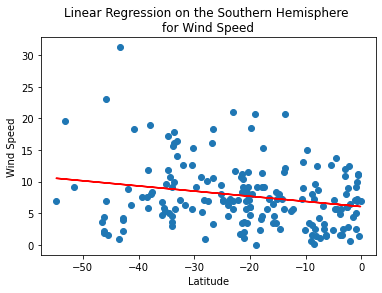

LinregressResult(slope=-0.0815821652120272, intercept=6.055888124405088, rvalue=-0.22147172173588522, pvalue=0.002382120367357868, stderr=0.026481765684956395)

In [90]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))
reg=linregress(x_values, y_values)
reg